In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Standardize the features
X_scaled = (X - np.mean(X)) / np.std(X)

# Add a column of ones for bias term
X_b = np.c_[np.ones((100, 1)), X_scaled]

# Initialize parameters
theta = np.random.randn(2, 1)

# Learning rate
eta = 0.01

# Number of iterations
n_iterations = 1000

# Custom loss function: |x - x_hat|^3
def custom_loss(y, y_pred):
    return np.mean(np.abs(y - y_pred) ** 3)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = -2/len(X_b) * X_b.T.dot(np.abs(y - X_b.dot(theta)) ** 2 * np.sign(y - X_b.dot(theta)))
    theta = theta - eta * gradients

# Extract intercept and slope from parameters
b, w = theta[0], theta[1:]

# Train linear regression model using scikit-learn
linear_reg_sklearn = LinearRegression()
linear_reg_sklearn.fit(X_scaled, y)



LinearRegression()

In [6]:
# Polynomial feature transformation
def poly_features(X, degree):
    X = np.array(X)  # Convert the list to a NumPy array
    X_poly = np.c_[X]
    for i in range(2, degree + 1):
        X_poly = np.c_[X_poly, np.power(X, i)]
    
    # Add a dimension with all elements set to 1 at the beginning
    X_4d = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
    return X_4d
    
#testing function results
X_ = [2, 3, 4]
result = poly_features(X_, 3)
print(result)

# Polynomial regression using gradient descent
def polynomial_regression(X, y, degree, learning_rate, n_iterations):
    m = len(X)
    X_poly = poly_features(X, degree)
    theta = np.random.randn(degree + 1, 1)

    for iteration in range(n_iterations):
        y_pred = X_poly.dot(theta)
        loss = custom_loss(y, y_pred)
        gradient = -X_poly.T.dot(np.sign(y - y_pred) * (y - y_pred)**6) / m
        theta -= learning_rate * gradient.reshape(-1, 1)  # Reshape gradient to match theta's shape
        
        if iteration % 100000 == 0:
            print(f"Iteration {iteration}, Loss: {np.mean(loss)}")

    return theta

# Fit the polynomial regression model
degree = 3
learning_rate = 0.0000001
n_iterations = 2500000
theta_poly = polynomial_regression(X_scaled, y, degree, learning_rate, n_iterations)
print(theta_poly)

[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]
Iteration 0, Loss: 305.38569893456605
Iteration 100000, Loss: 5.381671809803544
Iteration 200000, Loss: 3.7049598483893424
Iteration 300000, Loss: 2.9689846892529026
Iteration 400000, Loss: 2.5440485088713096
Iteration 500000, Loss: 2.2642810807140914
Iteration 600000, Loss: 2.0652585452266212
Iteration 700000, Loss: 1.9163211008897836
Iteration 800000, Loss: 1.8007785748435725
Iteration 900000, Loss: 1.7087218143527507
Iteration 1000000, Loss: 1.6338595201212462
Iteration 1100000, Loss: 1.5719944370184162
Iteration 1200000, Loss: 1.5202041804743904
Iteration 1300000, Loss: 1.4763814142707699
Iteration 1400000, Loss: 1.4389673640408258
Iteration 1500000, Loss: 1.4067849958325758
Iteration 1600000, Loss: 1.3789247081515423
Iteration 1700000, Loss: 1.3546713262324122
Iteration 1800000, Loss: 1.3334544498237395
Iteration 1900000, Loss: 1.3148134204065172
Iteration 2000000, Loss: 1.298372174925636
Iteration 2100000, Loss: 1.28382073

In [7]:
# Plot the results
X_scaled = (X - np.mean(X)) / np.std(X)
X_poly = poly_features(X_scaled, degree)
y_pred = X_poly.dot(theta_poly)


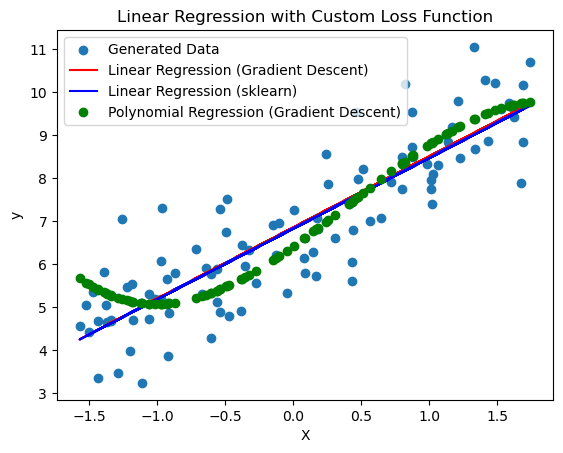

The line is [[1.65317678]]x+[6.84448666]
The polynomial function is [6.41166512]+[2.25058173]x+[0.50980336]x^2+[-0.39938846]x^3


In [8]:

# Plot the dataset and the linear regression line
plt.scatter(X_scaled, y, label='Generated Data')
plt.plot(X_scaled, X_b.dot(theta), label='Linear Regression (Gradient Descent)', color='red')
plt.plot(X_scaled, linear_reg_sklearn.predict(X_scaled), label='Linear Regression (sklearn)', color='blue')
plt.plot(X_scaled, y_pred, label = 'Polynomial Regression (Gradient Descent)', color = 'green',linestyle = 'None',marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Custom Loss Function')
plt.legend()
plt.show()

print(f'The line is {w}x+{b}')
print(f'The polynomial function is {theta_poly[0]}+{theta_poly[1]}x+{theta_poly[2]}x^2+{theta_poly[3]}x^3')